<a href="https://colab.research.google.com/github/SeeUSoon93/HTML-CSS-JS/blob/main/ex06_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95%2Ccallback_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 활성화함수와 경사하강법을 비교해보자!
- 모델링에 도움이되는 callback 함수(모델저장, 조기학습중단)를 알아보자~

#### 손글씨데이터를 활용하여 활성화함수와 경사하강법의 조항을 다르게 설정하여 학습 및 평가를 진행!

1. sigmoid + SGD
2. relu + SGD
3. relu + Adam

In [ ]:
# 라이브러리 불러오기
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스 불러와서 사용(학습률 조정)

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# 1. sigmoid+SGD 조합으로 모델생성 및 학습, 평가
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
model1 = Sequential()
model1.add(InputLayer(input_shape = (28,28)))
model1.add(Flatten())
model1.add(Dense(units=64, activation = 'sigmoid'))
model1.add(Dense(units=128, activation = 'sigmoid'))
model1.add(Dense(units=256, activation = 'sigmoid'))
model1.add(Dense(units=128, activation = 'sigmoid'))
model1.add(Dense(units=64, activation = 'sigmoid'))
model1.add(Dense(units=10, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(),
               metrics = ['accuracy'])
h1 = model1.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 128)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3161 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3008 - accuracy: 0.1144 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3007 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3006 - accuracy: 0.1145 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 2.3004 - accuracy: 0.1149 - val_loss: 2.3006 - val_accuracy: 0.1060
Epoch 

In [ ]:
# 2. relu + SGD 조합으로
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스 불러와서 사용시 학습률 조정
model2 = Sequential()
model2.add(InputLayer(input_shape = (28,28)))
model2.add(Flatten())
model2.add(Dense(units=64, activation = 'relu'))
model2.add(Dense(units=128, activation = 'relu'))
model2.add(Dense(units=256, activation = 'relu'))
model2.add(Dense(units=128, activation = 'relu'))
model2.add(Dense(units=64, activation = 'relu'))
model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate = 0.001), # 학습률을 0.001로 변경
               metrics = ['accuracy'])
h2 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 1.3541 - accuracy: 0.7061 - val_loss: 0.5831 - val_accuracy: 0.8285
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.5161 - accuracy: 0.8470 - val_loss: 0.4453 - val_accuracy: 0.8723
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4036 - accuracy: 0.8799 - val_loss: 0.3732 - val_accuracy: 0.8910
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3417 - accuracy: 0.8990 - val_loss: 0.3393 - val_accuracy: 0.8969
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3009 - accuracy: 0.9100 - val_loss: 0.3194 - val_accuracy: 0.9046
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2721 - accuracy: 0.9190 - val_loss: 0.2960 - val_accuracy: 0.9128
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2490 - accuracy: 0.9249 - val_loss: 0.2767 - val_accuracy: 0.9157
Epoch 

In [ ]:
# relu + Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
model3 = Sequential()
model3.add(InputLayer(input_shape = (28,28)))
model3.add(Flatten())
model3.add(Dense(units=64, activation = 'relu'))
model3.add(Dense(units=128, activation = 'relu'))
model3.add(Dense(units=256, activation = 'relu'))
model3.add(Dense(units=128, activation = 'relu'))
model3.add(Dense(units=64, activation = 'relu'))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])
h3 = model3.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.7774 - accuracy: 0.8301 - val_loss: 0.3034 - val_accuracy: 0.9137
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2311 - accuracy: 0.9313 - val_loss: 0.2156 - val_accuracy: 0.9422
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1657 - accuracy: 0.9512 - val_loss: 0.1838 - val_accuracy: 0.9502
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1341 - accuracy: 0.9595 - val_loss: 0.1675 - val_accuracy: 0.9531
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1136 - accuracy: 0.9653 - val_loss: 0.1699 - val_accuracy: 0.9548
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9699 - val_loss: 0.1543 - val_accuracy: 0.9587
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0834 - accuracy: 0.9742 - val_loss: 0.1390 - val_accuracy: 0.9631
Epoch 

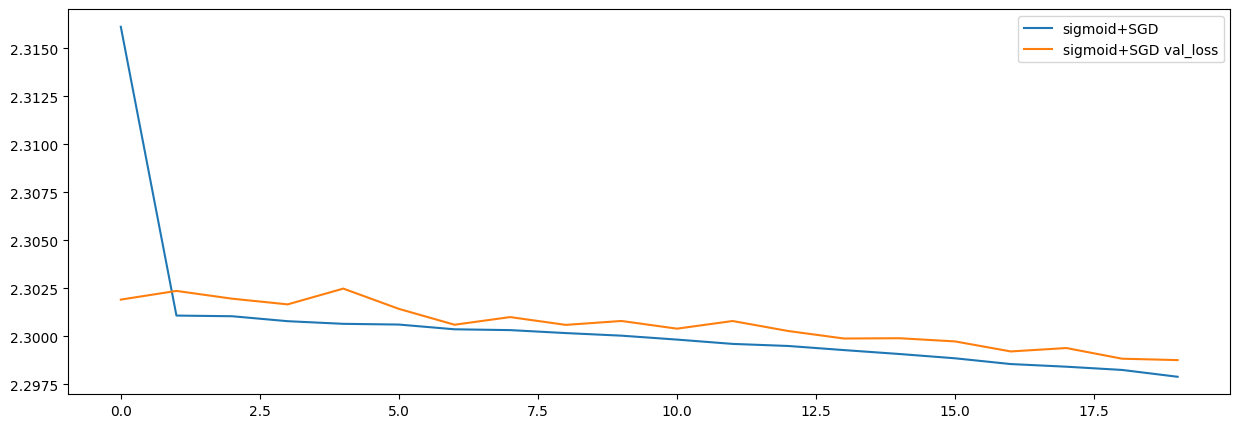

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label='sigmoid+SGD')
plt.plot(h1.history['val_loss'], label='sigmoid+SGD val_loss')
plt.legend()
plt.show()

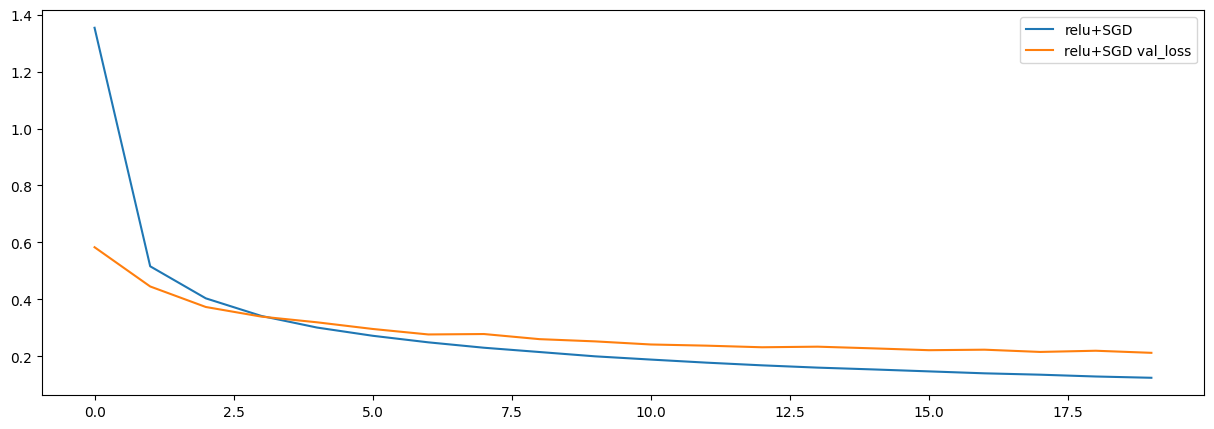

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h2.history['loss'], label='relu+SGD')
plt.plot(h2.history['val_loss'], label='relu+SGD val_loss')
plt.legend()
plt.show()

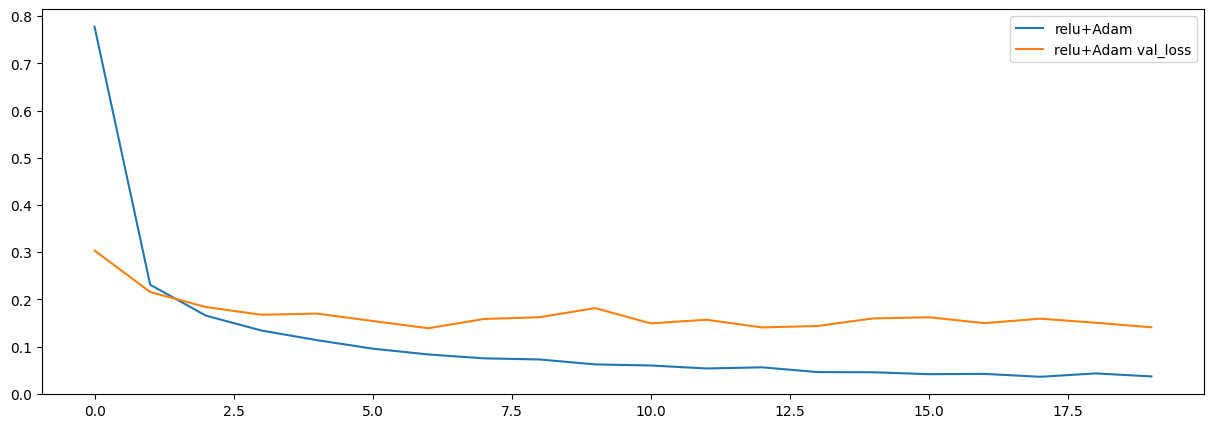

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h3.history['loss'], label='relu+Adam')
plt.plot(h3.history['val_loss'], label='relu+Adam val_loss')
plt.legend()
plt.show()

### callback 함수
- 모델저장, 조기학습중단
  - 모델저장 : 딥러닝 모델 학습시 지정된 epochs를 모두 진행하면 과대적합의 위험이 있다! -> 중간에 일반화된 모델을 저장할 수 있는 기능
  - 조기학습중단 : epochs를 크게 설정한 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있을 수 있음 -> 일정횟수 다음 학습을 중단

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 모델저장 객체 생성
# 모델 저장 경로 설정
model_path='/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/best_model/bose_model_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
cp = ModelCheckpoint(filepath = model_path,
                     verboase = 1, # 로그 출력 > 학습기록
                     save_best_only = True,
                     # 모델이 최고성능을 도달할 때만 저장
                     monitor = 'val_accuracy')

In [ ]:
# 조기학습 중단 객체 생성
early = EarlyStopping(monitor = 'val_accuracy',
                      verbose = 1,
                      patience = 10) # 모델성능의 개선을 기다려주는 횟수

In [ ]:
# relu + Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
model3 = Sequential()
model3.add(InputLayer(input_shape = (28,28)))
model3.add(Flatten())
model3.add(Dense(units=64, activation = 'relu'))
model3.add(Dense(units=128, activation = 'relu'))
model3.add(Dense(units=256, activation = 'relu'))
model3.add(Dense(units=128, activation = 'relu'))
model3.add(Dense(units=64, activation = 'relu'))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])
h3 = model3.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 128,
                callbacks = [cp, early])

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.7347 - accuracy: 0.8214 - val_loss: 0.2580 - val_accuracy: 0.9208
Epoch 2/100
 25/375 [=>............................] - ETA: 1s - loss: 0.2572 - accuracy: 0.9219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 2s 5ms/step - loss: 0.2248 - accuracy: 0.9334 - val_loss: 0.1955 - val_accuracy: 0.9425
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1660 - accuracy: 0.9501 - val_loss: 0.1771 - val_accuracy: 0.9467
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1325 - accuracy: 0.9603 - val_loss: 0.1525 - val_accuracy: 0.9553
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1005 - accuracy: 0.9691 - val_loss: 0.1494 - val_accuracy: 0.9578
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.1682 - val_accuracy: 0.9543
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0841 - accuracy: 0.9742 - val_loss: 0.1262 - val_accuracy: 0.9637
Epoch 8/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.1513 - val_accuracy: 0.9598
Epoch 9/100

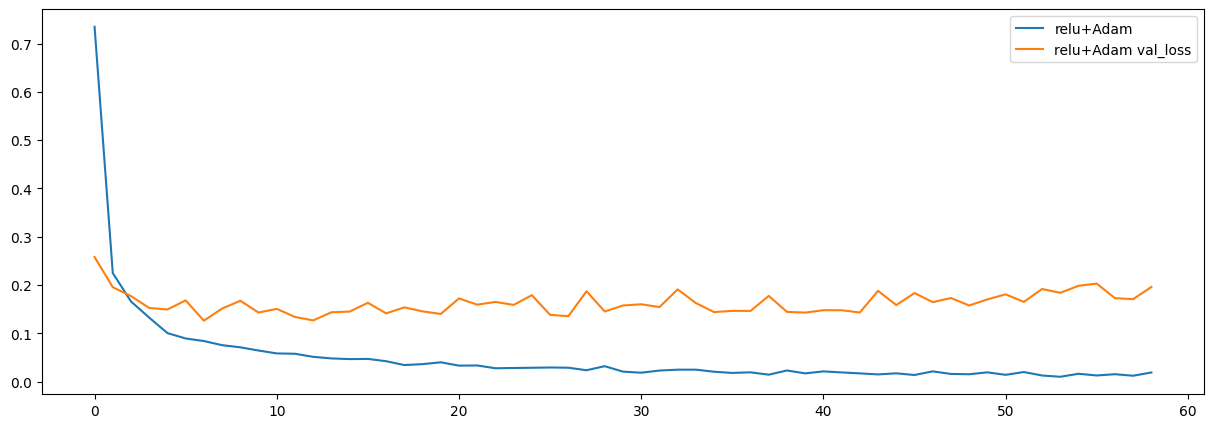

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h3.history['loss'], label='relu+Adam')
plt.plot(h3.history['val_loss'], label='relu+Adam val_loss')
plt.legend()
plt.show()

In [ ]:
### best_model 불러오는 방법
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/best_model/bose_model_49_0.98.hdf5')

In [ ]:
# 파이썬 이미지처리 라이브러리
import PIL.Image as pimg

img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/손글씨02.png').convert('L')
# convert('L'): 컬러이미지를 흑백으로 변환
img = np.array(img)
test_img = img.reshape(1,28,28,1)
test_img = test_img.astype('float32')/255

In [ ]:
best_model.predict(test_img)

1/1 [==============================] - 0s 14ms/step


array([[0.08417451, 0.0737143 , 0.09192055, 0.09011421, 0.08168014,
        0.10190698, 0.07556083, 0.07853255, 0.18250144, 0.13989444]],
      dtype=float32)